# Descrizione
Il dataset che utilizziamo per l'analisi e' weatherAus, un dataset di osservazioni metereologiche in Australia.
RainTomorrow è la variabile target da prevedere e sta ad indicare: ha piovuto il giorno successivo, sì o no? Questa colonna è Sì se la pioggia per quel giorno era di 1 mm o più.

# Importiamo i dati

In [1]:
import pandas as pd
full_data = pd.read_csv('C:/Users/Francesco/Desktop/PROGETTO_NALDI/weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Esplorazione dei dati
Per prima cosa controlliamo il numero di righe e colonne e con la funzione info() otterremo alcune informazioni sulle colonne del nostro dataset.

In [2]:
full_data.shape

(142193, 24)

Possiamo notare che il nostro dataset e' formato da 142193 istanze e 24 features.

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Sia "RainToday" che "RainTomorrow" hanno valori (Sì / No). Li convertiremo in binario (1/0) per comodità.

In [4]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

Successivamente, controlleremo se il set di dati è **sbilanciato o bilanciato**. Se il set di dati è sbilanciato, dobbiamo sottocampionare la maggioranza o sovracampionare la minoranza per bilanciarlo.

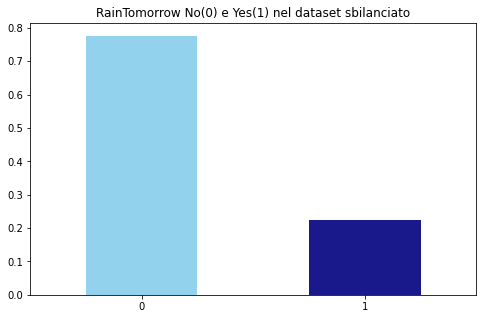

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow No(0) e Yes(1) nel dataset sbilanciato')
plt.show()

In [6]:
full_data['RainTomorrow'].value_counts()/len(full_data)

0    0.775819
1    0.224181
Name: RainTomorrow, dtype: float64

Possiamo osservare che la presenza di "0" e "1" sono quasi nel rapporto 78:22. Quindi c'è uno squilibrio di classe e dobbiamo gestirlo. Per affrontare lo squilibrio di classe, useremo il     **sovracampionamento della classe di minoranza**.

# Gestione sblilanciamento delle classi

Ricampioniamo i dati in modo da poter bilanciare le classi yes e no. Alla fine creiamo un dataset nominato oversampled che risultera' bilanciato.

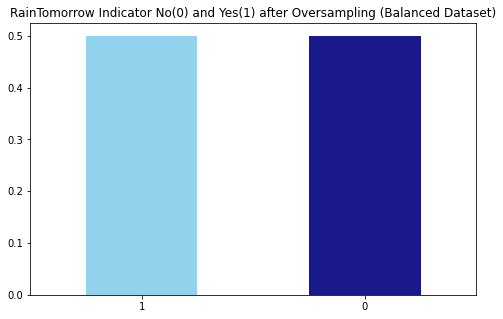

In [7]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

Adesso controlliamo il pattern di dati mancanti. Lo facciamo prima graficamente in modo da poter visualizzare le features che presentano un numero maggiore di dati mancanti.

<AxesSubplot:>

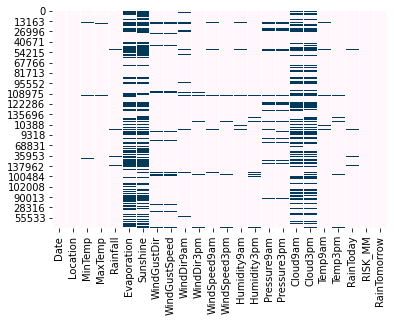

In [8]:
# Pattern dei dati mancanti
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

Visibilmente, **"Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"** sono le feature con un'alta percentuale di dati mancanti. Quindi controlleremo i dettagli dei dati mancanti per queste 4.

In [9]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


Possiamo notare che, nonstante le 4 feature siano le feature con piu' dati mancanti nel nostro dataset, la percentuale di dati mancanti e' < 50%. Quindi invece di scartarle completamente dal nostro dataset e dai modelli successivi, imputeremo i dati.

# Imputazione dati mancanti

In questa sezione andremo a vedere quali sono le nostre variabili numeriche e quanti sono i loro valori mancanti. Inoltre visualizzeremo anche quali sono le variabili categoriche del nostro dataset e andremo ad imputare i loro dati mancanti con la moda della specifica feature.

In [10]:
numerical = [col for col in oversampled.columns if oversampled[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

Possiamo notare che i valori mancanti sono presenti in praticamente tutte le features.

In [11]:
oversampled[numerical].isnull().sum()

MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustSpeed     15354
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RISK_MM               0
RainTomorrow          0
dtype: int64

In [12]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

Imputiamo le variabili categoriche con la moda.

In [13]:
# Imputiamo i valori mancanti variabili categoriche con la moda
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

Al fine di poter procedere con la nostra analisi, convertiamo le feature categoriche in feature con valori continui.

In [14]:
# Convertiamo feature categoriche in continue con Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [15]:
oversampled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


Ora possiamo vedere infatti che per esempio i valori della variabile categorica WindGustDir sono stati sostituiti con numeri interi che difatti rappresentano i 16 diversi livelli (es: W, WSW, NE, NE, ecc..) della stessa variabile.

In [16]:
import warnings
warnings.filterwarnings("ignore")

#### Imputazione MICE
Abbiamo visto che le nostre features presentano valori mancanti. Ora, assumiamo che i dati mancanti siano mancanti completamente in maniera random (MCAR) e che i valori da imputare al loro posto non siano ricavabili da nessuna misura nel nostro dataset. Per imputare i dati in modo preciso quindi non useremo un metodo di imputazione univariato che tenga conto di una feature per volta e sostituisca i valori mancanti con media, mediana ecc, ma useremo un metodo di imputazione multivariata chiamato 'MICE' ovvero Multivariate Imputation By Chained Equations. Questo metodo quindi cerchera' di predire i valori mancanti non tenendo conto di una feature alla volta ma guardando anche ai valori delle altre features del dataset al fine di imputare i dati mancanti.

In [17]:
# Imputazione MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [18]:
MiceImputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.735438,7.364116,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.868720,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.639582,11.470601,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.734671,2.639541,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.762987,12.281872,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.820254,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.977338,11.743982,4.0,24.0,9.0,...,16.0,1017.6,1012.8,1.236006,2.133027,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.852950,5.756442,13.0,41.0,1.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0


Dopo aver imputato i valori mancanti andiamo ad accertarci che il nostro dataset non contenga piu' dati mancanti.

In [19]:
MiceImputed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

Come vediamo, dopo l'imputazione con algoritmo MICE, non sono piu' presenti valori mancanti nel nostro dataset. Possiamo quindi procedere con l'individuazione dei valori anomali per ogni feature grazie all'iqr.

In [20]:
# Troviamo outliers con iqr
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


Ora che abbiamo calcolato l'iqr (differenza tra il terzo e il primo quartile per ogni feature) procediamo con la rimozione dei valori anomali dal dataset. I valori anomali sono definiti come: valori tali che o sono minori del primo quartile della feature meno una costante k (1.5) moltiplicata per l'iqr o sono maggiori del terzo quartile di una data feature sommato alla costante k moltiplicata per l'iqr. Tutti questi dati vengono rimossi dal nostro dataset.

In [21]:
# Rimozione outliers dal dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156852, 24)

Possiamo ora osservare che la dimensione del nostro dataset e' diminuita dopo aver eliminato i valori outliers.

Andiamo a fare una correlation heatmap in modo da poter visualizzare i valori di correlazione tra le diverse features.

<AxesSubplot:>

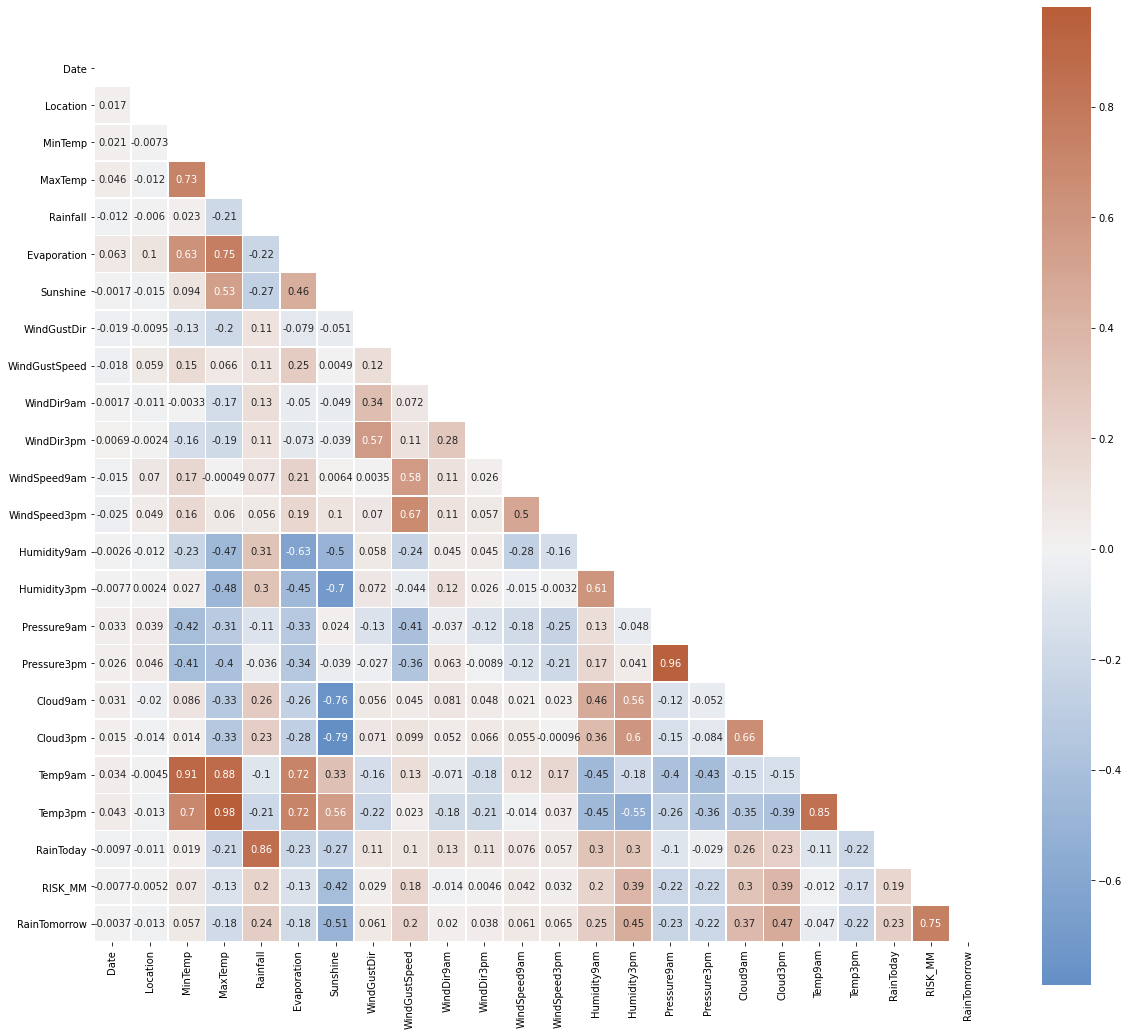

In [22]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

Cio' che possiamo osservare dalla seguente heatmap e' che ci sono alcune variabili abbastanza correlate tra loro:

* MaxTemp and MinTemp
* Pressure9am and Pressure3pm
* Temp9am and Temp3pm
* Evaporation and MaxTemp
* MaxTemp and Temp3pm
In ogni caso nessuna coppia di feature presenta una correlazione uguale a 1 e quindi non scartiamo a prescindere nessuna delle features dalla nostra analisi.

Possiamo comunque andare a visualizzare melgio la correlazione tra queste features facendo un pair plot.

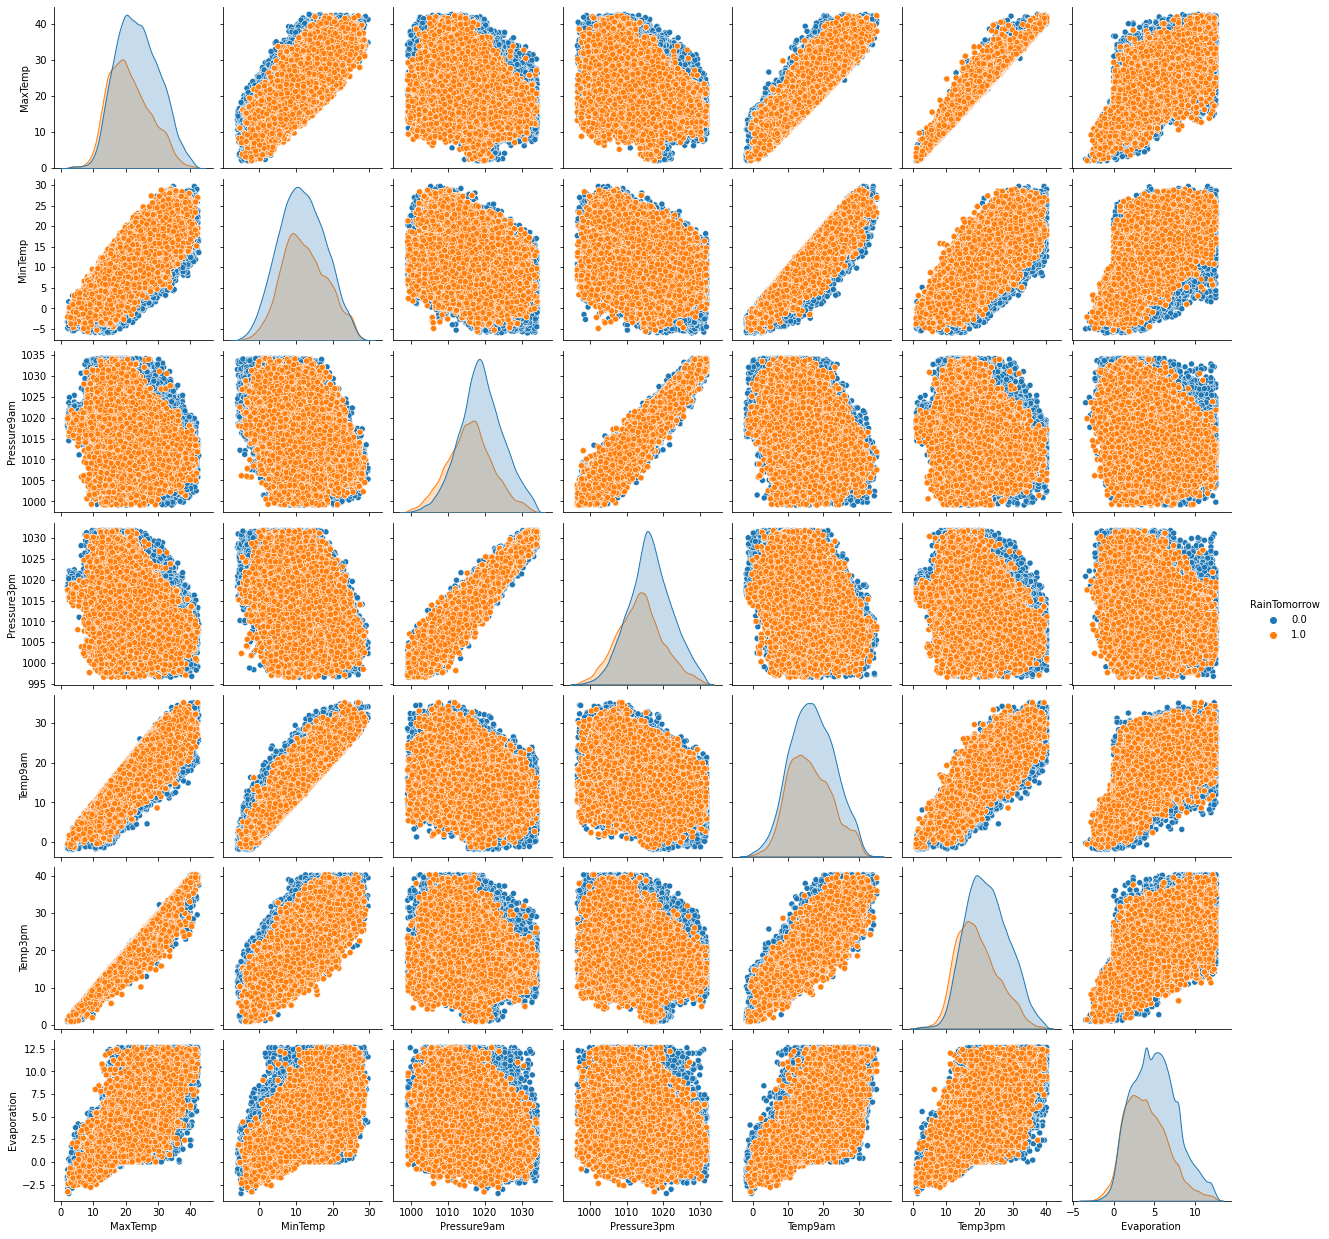

In [23]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )


# Selezione delle features

**Selezione delle feature con metodo Chi-quadrato :** Prima di poter fare la selezione delle features dobbiamo standardizzare i dati. Lo facciamo con la libreria preprocessing di sklearn e usiamo la funzione MinMaxScaler().

In [24]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.115284,0.041667,0.543417,0.514778,0.432327,0.569942,0.502581,0.866667,0.521127,0.866667,...,0.220253,0.245714,0.298295,0.866337,0.420182,0.506775,0.530612,0.247121,0.000000,0.0
1,0.115575,0.041667,0.375350,0.568966,0.369252,0.564016,0.741068,0.933333,0.521127,0.400000,...,0.250243,0.328571,0.318182,0.338787,0.227798,0.514905,0.594388,0.247121,0.000000,0.0
2,0.115866,0.041667,0.529412,0.583744,0.369252,0.695290,0.788183,1.000000,0.549296,0.866667,...,0.300227,0.242857,0.343750,0.345994,0.172605,0.617886,0.566327,0.247121,0.000000,0.0
3,0.116157,0.041667,0.425770,0.640394,0.369252,0.584897,0.756945,0.266667,0.239437,0.600000,...,0.160272,0.528571,0.460227,0.296799,0.184085,0.539295,0.650510,0.247121,0.076923,0.0
4,0.116448,0.041667,0.658263,0.746305,0.474377,0.639029,0.409215,0.866667,0.478873,0.066667,...,0.330217,0.334286,0.267045,0.782136,0.690418,0.531165,0.732143,0.247121,0.015385,0.0


In [25]:
# Importanza feature con metodo Chi-quadrato
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


# Split del dataset in training e testing
Divideremo ora il nostro dataset in train e testing assegnando rispettivamente il 75% al traininig e il 25% al testing. La funzione di sklearn train_test_split() ci permette di fare cio' in modo semplice semplicemente specificando i dati, la nostra variabile target 'RainTomorrow', la dimesione del set di testing e un valore random_state per rendere riproducibile lo split. Prima di fare cio' normalizzeremo i nostri dati scalandoli con la funzione StandardScaler() di sklearn.

Inoltre non includeremo la variabile RISK_MM nei nostri mmodelli poiche', come spiega l'autore del dataset, e' consigliato di eliminarla dal dataset in quanto: "
Comprende tutte le forme di precipitazione che raggiungono il suolo, come pioggia, pioviggine, grandine e neve. Ed è stata la colonna che è stata utilizzata per determinare effettivamente se ha piovuto o meno per creare l'obiettivo binario. Ad esempio, se RISK_MM era maggiore di 1 mm, la variabile target RainTomorrow è uguale a Sì.
Dal momento che contiene informazioni sul futuro e poiché contiene informazioni direttamente sulla variabile di destinazione, includerla potrebbe far trapelare le informazioni future al modello. Usarla come predittore per costruire un modello darebbe la falsa apparenza di un'elevata precisione."

In [26]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split in test e train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Creiamo qui sotto una funzione plot_roc_cur() che ci permettera' in seguito di fare il plot della curva ROC

In [27]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Importiamo il modulo time per poter calcolare il tempo di esecuzione. Creiamo una funzione che ci permettera' di testare i vari modelli e ci restituira' anche accuracy, il valore AUC, il plot della curva ROC, e il plot della confusion matrix.

In [28]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

# Modelli

In questa sezione procederemo nel nostro intento di classificare se domani piovera' o meno in Australia. Per fare cio' implementiamo diversi classificatori. Il primo classificatore che creiamo e' basato su regressione logistica. Per implementarlo useremo la funzione LogisticRegression() della libreria sklearn.

**Modello 1: Regressione logistica**

Accuracy = 0.7896105883253003
ROC Area under Curve = 0.7697489363213045
Cohen's Kappa = 0.5494024537691498
Time taken = 0.9813745021820068
              precision    recall  f1-score   support

         0.0    0.80821   0.85945   0.83304     23948
         1.0    0.75515   0.68005   0.71563     15265

    accuracy                        0.78961     39213
   macro avg    0.78168   0.76975   0.77434     39213
weighted avg    0.78756   0.78961   0.78734     39213



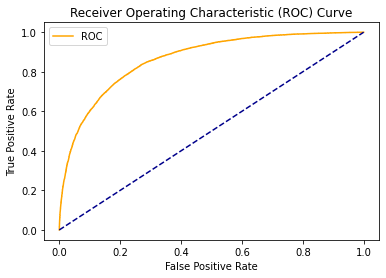

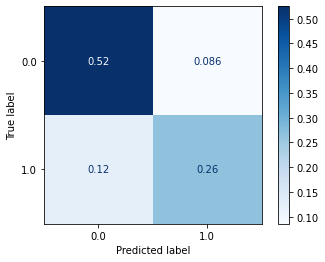

In [29]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

**Modello 2: Naive Bayes**

Il secondo classificatore che implementiamo e' il Naive Bayes. Lo facciamo usando la funzione GaussianNB() sempre della libreria sklearn.

Accuracy = 0.7438604544411292
ROC Area under Curve = 0.7369482114622079
Cohen's Kappa = 0.4680048673007333
Time taken = 0.18650054931640625
              precision    recall  f1-score   support

         0.0    0.80374   0.76816   0.78555     23948
         1.0    0.65991   0.70573   0.68205     15265

    accuracy                        0.74386     39213
   macro avg    0.73182   0.73695   0.73380     39213
weighted avg    0.74775   0.74386   0.74526     39213



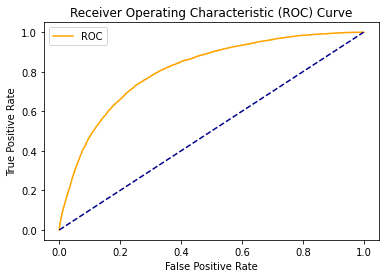

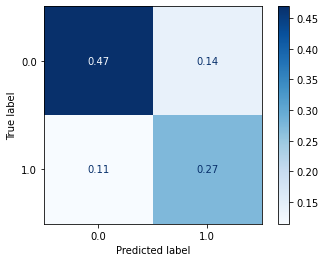

In [30]:
from sklearn.naive_bayes import GaussianNB
# We define the model
modelNa = GaussianNB()
modelNa, accuracy_na, roc_auc_na, coh_kap_na, tt_na = run_model(modelNa, X_train, y_train, X_test, y_test)

**Modello 3: Albero di decisione**

Il terzo modello che costruiamo e' un albero di decisione.

Accuracy = 0.8629281105755744
ROC Area under Curve = 0.8601657587509043
Cohen's Kappa = 0.7141822862166614
Time taken = 0.48170900344848633
              precision    recall  f1-score   support

         0.0    0.89988   0.87264   0.88605     23948
         1.0    0.80926   0.84769   0.82803     15265

    accuracy                        0.86293     39213
   macro avg    0.85457   0.86017   0.85704     39213
weighted avg    0.86460   0.86293   0.86346     39213



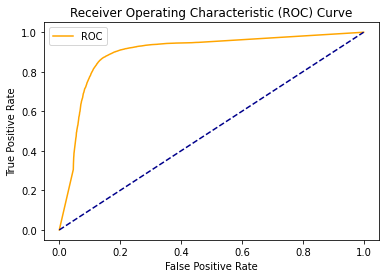

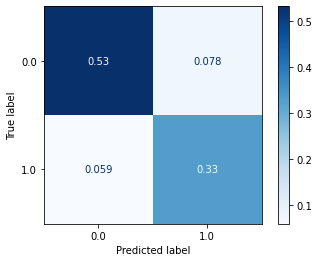

In [31]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

**Modello 4: Random Forest**

Il quarto modello che costruiamo e' il Random Forest.

Accuracy = 0.9280595720806876
ROC Area under Curve = 0.9265770863620824
Cohen's Kappa = 0.8493714659078331
Time taken = 25.39761519432068
              precision    recall  f1-score   support

         0.0    0.94812   0.93327   0.94064     23948
         1.0    0.89783   0.91988   0.90872     15265

    accuracy                        0.92806     39213
   macro avg    0.92297   0.92658   0.92468     39213
weighted avg    0.92854   0.92806   0.92821     39213



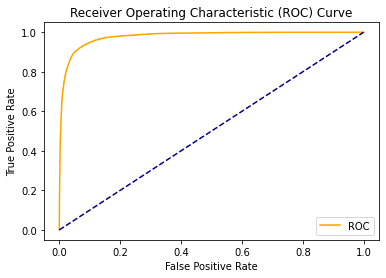

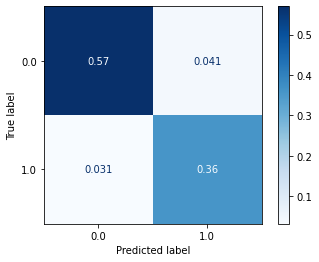

In [32]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

**Modello 5: Light GBM** <br>
LightGBM è un framework di gradient boosting che utilizza algoritmi di apprendimento basati su alberi. La particolarita' del lightgbm rispetto ad altri algoritmi basati su alberi e' che costruisce questi ultimi in maniera leaf-wise e non level-wise.E' un algoritmo che garantisce ottime prestazioni ma proprio perche' costruisce gli alberi in maniera leaf-wife potrebbe essere suscettibile ad overfitting. Cerchiamo di evitare che cio' accada settando alcuni parametri come per esempio max_depth che cerca di gesitre la profondita' dell'albero. È progettato per essere efficiente e con i seguenti vantaggi:
<li>Maggiore velocità di addestramento e maggiore efficienza.</li>
<li>Riduzione dell'utilizzo della memoria.</li>
<li>Migliore accuracy.</li>
<li>Capacita' di supportare dati di grandi dimensioni.</li>

Accuracy = 0.8684619896462907
ROC Area under Curve = 0.860694163700355
Cohen's Kappa = 0.7228133047900757
Time taken = 4.090031623840332
              precision    recall  f1-score   support

         0.0    0.88961   0.89577   0.89268     23948
         1.0    0.83469   0.82561   0.83013     15265

    accuracy                        0.86846     39213
   macro avg    0.86215   0.86069   0.86140     39213
weighted avg    0.86823   0.86846   0.86833     39213



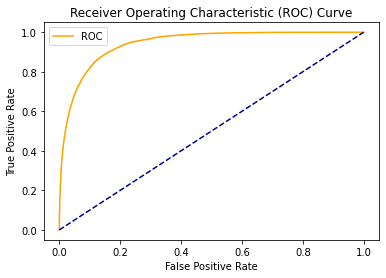

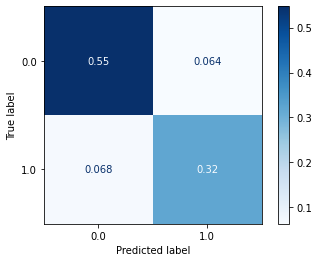

In [33]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

**Modello 6: CatBoost**

CatBoost si basa su alberi decisionali potenziati dal gradiente. Durante l'addestramento, una serie di alberi decisionali viene costruita consecutivamente. Ogni albero successivo viene costruito cercando di ottenere migliori prestazioni rispetto agli alberi precedenti. Per getsire il pericolo di alberi troppo profondi e quindi suscettibili ad overfitting, settiamo il parametro max_depth che ci aiuta a gestire la profondita' dell'albero.

Accuracy = 0.9418560171371739
ROC Area under Curve = 0.9449267946584342
Cohen's Kappa = 0.8791826232502136
Time taken = 507.9145197868347
              precision    recall  f1-score   support

         0.0    0.97256   0.93106   0.95136     23948
         1.0    0.89863   0.95879   0.92774     15265

    accuracy                        0.94186     39213
   macro avg    0.93560   0.94493   0.93955     39213
weighted avg    0.94378   0.94186   0.94216     39213



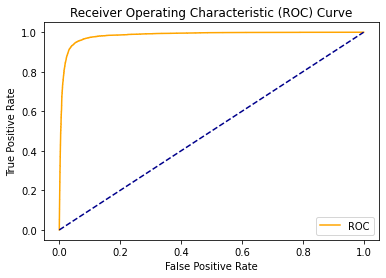

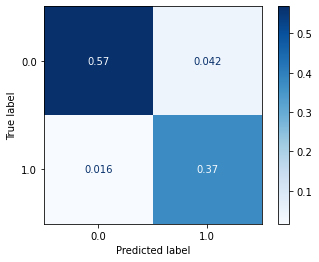

In [34]:
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

**Modello 7: XGBoost**

L'ultimo modello che implementiamo e' l'XGboost ovvero extreme gradient bosting. E' una tecnica di apprendimento di insieme.E' progettato per funzionare con dataset di dimensioni anche grandi. Nell' xgboost si cercano di costruire piu' alberi ognuno che cerca di adattarsi all'errore residuo.

[18:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9563665111060108
ROC Area under Curve = 0.9565810552736519
Cohen's Kappa = 0.908683590430594
Time taken = 200.1191222667694
              precision    recall  f1-score   support

         0.0    0.97246   0.95561   0.96396     23948
         1.0    0.93221   0.95755   0.94471     15265

    accuracy                        0.95637     39213
   macro avg    0.95234   0.95658   0.95434     39213
weighted avg    0.95679   0.95637   0.95647     39213



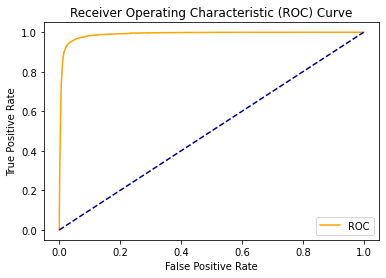

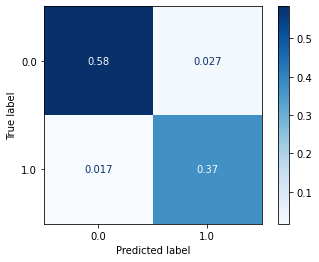

In [35]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# Compariamo i modelli

In questa sezione mettiamo in paragone tutti i modelli che abbiamo appena costruito per valutare quali siano stati i modelli in base ad accuracy, tempo di esecuzione, parametro cohen kappa che e' un coefficiente statistico che ci indica il grado di accuratezza di una classificazione. Se questo indice k assume valori inferiori a 0, allora non c'è concordanza;
se k assume valori compresi tra 0-0,4, allora la concordanza è scarsa;
se k assume valori compresi tra 0,4-0,6, allora la concordanza è discreta;
se k assume valori compresi tra 0,6-0,8, la concordanza è buona;
se k assume valori compresi tra 0,8-1, la concordanza è ottima.

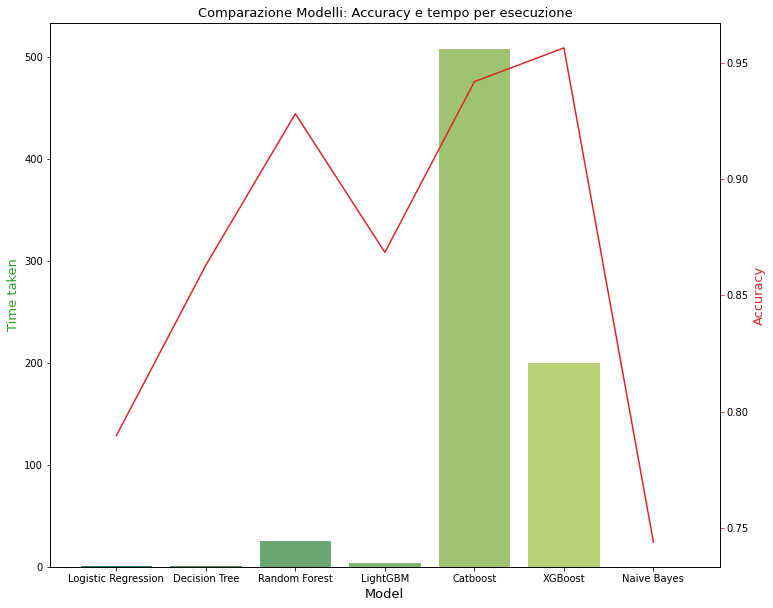

In [36]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb, accuracy_na]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb, roc_auc_na]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb, coh_kap_na]
tt = [tt_lr, tt_dt, tt_rf, tt_lgb, tt_cb, tt_xgb, tt_na]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','Catboost','XGBoost', 'Naive Bayes'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Comparazione Modelli: Accuracy e tempo per esecuzione', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

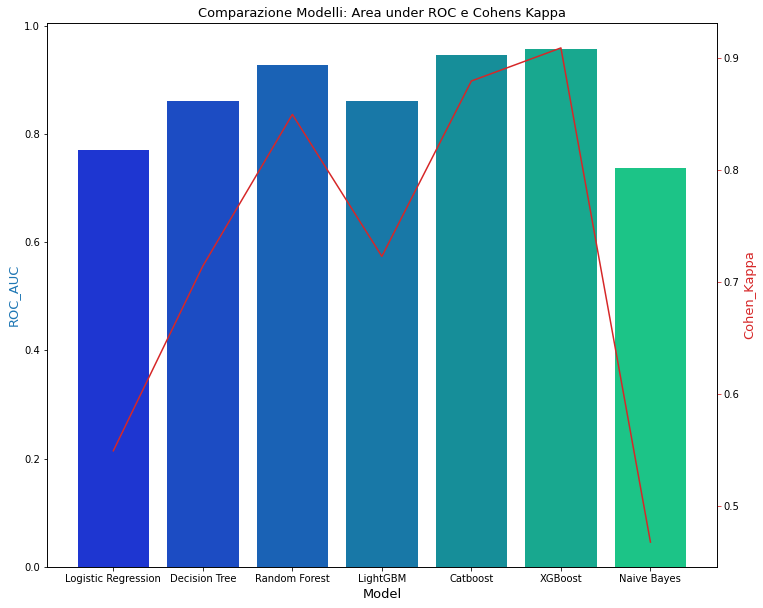

In [37]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Comparazione Modelli: Area under ROC e Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

# Conclusioni
Possiamo osservare che **XGBoost, CatBoost e Random Forest** si sono comportati meglio rispetto ad altri modelli. Tuttavia, se consideriamo la velocita' di esecuzione, possiamo attenerci a Random Forest invece di XGBoost o CatBoost.

Infine, per ogni classificatore che abbiamo implementato possiamo vedere che la maggioranza delle decisioni conferma che **domani non ci sara' pioggia** sopra 1mm in Australia.